In [6]:
import pyvista as pv
import numpy as np

# Paths for the datasets
dataset_path_u = r"H:/DDGAN/dataset_u/"
dataset_path_v = r"H:/DDGAN/dataset_v/"
output_path = r"H:/DDGAN/DD_test/"

def process_and_save(dataset_path, filenames, variable_name):
    for filename in filenames:
        # Load the VTK file
        file_path = dataset_path + filename + '.vtk'
        mesh = pv.read(file_path)

        # Assuming the data is stored as point data in VTK
        data_key = 'v'  # Adjust this as necessary to match your data keys
        if data_key in mesh.point_data:
            data = mesh.point_data[data_key]
            # Reshape the data into a 256x256 grid
            reshaped_data = data.reshape(256, 256)
            # Save the reshaped data as an npy file
            np.save(output_path + f'{filename}_{variable_name}_reshaped.npy', reshaped_data)
        else:
            print(f"Data key '{data_key}' not found in {filename}.vtk")

# Filenames for u and v datasets
u_filenames = ['u_0', 'u_1']
v_filenames = ['v_0', 'v_1']

# Process u and v datasets
process_and_save(dataset_path_u, u_filenames, 'u')
process_and_save(dataset_path_v, v_filenames, 'v')

print("Data processing and saving completed successfully.")

Data key 'v' not found in u_0.vtk
Data key 'v' not found in u_1.vtk
Data processing and saving completed successfully.


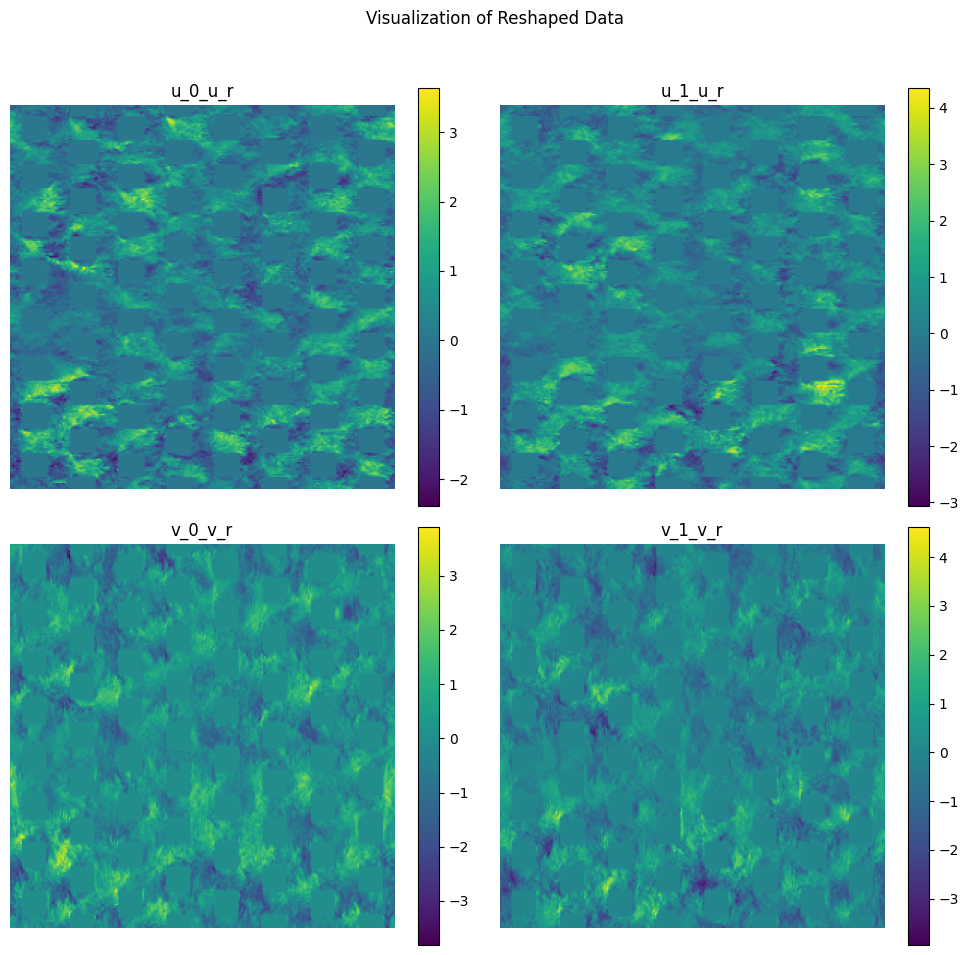

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the path where the .npy files are stored
output_path = r"H:/DDGAN/DD_test/"

# Filenames for the npy files to plot
files_to_plot = ['u_0_u_reshaped.npy', 'u_1_u_reshaped.npy', 'v_0_v_reshaped.npy', 'v_1_v_reshaped.npy']

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, filename in enumerate(files_to_plot):
    # Load the npy file
    data = np.load(output_path + filename)

    # Plot data
    ax = axs[i//2, i%2]  # Determine the subplot row and column
    c = ax.imshow(data, cmap='viridis', origin='lower')
    ax.set_title(filename[:-11])  # Remove the '_reshaped.npy' part for the title
    ax.axis('off')  # Hide axes

    # Add a colorbar
    fig.colorbar(c, ax=ax)

plt.suptitle("Visualization of Reshaped Data")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the subplots to provide space for the super title
plt.show()

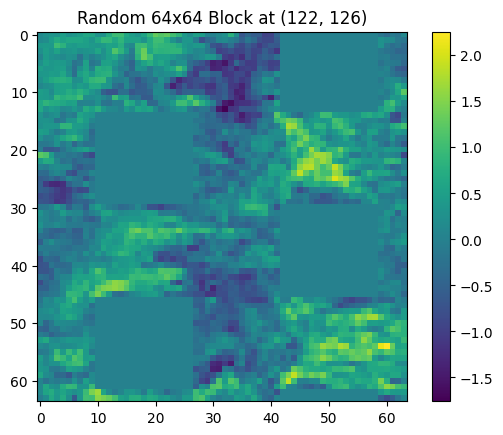

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Path to the .npy file
file_path = r"H:/DDGAN/DD_test/u_0_u_reshaped.npy"

# Load the grid from the .npy file
grid = np.load(file_path)

def pick_random_block(grid):
    height, width = grid.shape
    min_x = 64
    max_x = width - 128
    min_y = 64
    max_y = height - 128
    x = np.random.randint(min_x, max_x + 1)
    y = np.random.randint(min_y, max_y + 1)
    block = grid[y:y+64, x:x+64]
    return block, (y, x)


random_block, (top_left_y, top_left_x) = pick_random_block(grid)

# Visualizing the random block
plt.imshow(random_block, cmap='viridis')
plt.title(f'Random 64x64 Block at ({top_left_y}, {top_left_x})')
plt.colorbar()
plt.show()

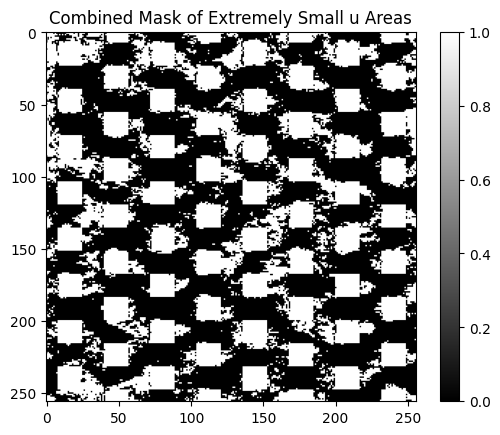

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Paths to the .npy files where the reshaped u data is stored
file_path1 = r"H:/DDGAN/DD_test/u_0_u_reshaped.npy"
file_path2 = r"H:/DDGAN/DD_test/u_1_u_reshaped.npy"

# Load the reshaped data from the .npy files
u_data1 = np.load(file_path1)
u_data2 = np.load(file_path2)

# Define the threshold for "extremely small"
threshold = 0.0001  # You can adjust this value based on your specific needs

# Generate the masks for both grids
mask1 = np.where(u_data1 < threshold, 1, 0)
mask2 = np.where(u_data2 < threshold, 1, 0)

# Combine the masks to find common areas
combined_mask = mask1 & mask2  # Using bitwise AND to overlap the masks

# Save the combined mask (optional)
np.save(r"H:/DDGAN/DD_test/u_combined_small_mask.npy", combined_mask)

# Visualizing the combined mask
plt.imshow(combined_mask, cmap='gray')
plt.title('Combined Mask of Extremely Small u Areas')
plt.colorbar()
plt.show()

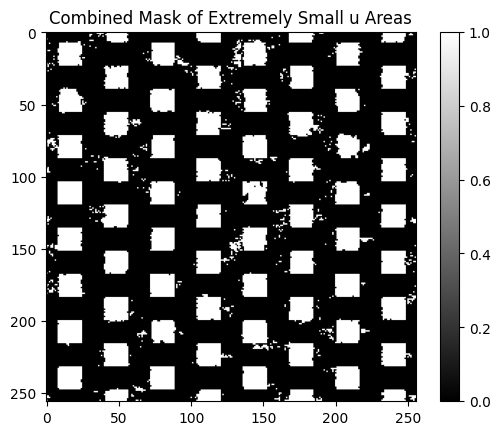

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Paths to the .npy files where the reshaped u data is stored
file_path1 = r"H:/DDGAN/npy_files/uv_0.npy"
file_path2 = r"H:/DDGAN/npy_files/uv_1.npy"
file_path3 = r"H:/DDGAN/npy_files/uv_10.npy"
file_path4 = r"H:/DDGAN/npy_files/uv_50.npy"
file_path5 = r"H:/DDGAN/npy_files/uv_100.npy"
file_path6 = r"H:/DDGAN/npy_files/uv_500.npy"
file_path7 = r"H:/DDGAN/npy_files/uv_1000.npy"


u_data1 = np.load(file_path1)
u_data2 = np.load(file_path2)
u_data3 = np.load(file_path3)
u_data4 = np.load(file_path4)
u_data5 = np.load(file_path5)
u_data6 = np.load(file_path6)
u_data7 = np.load(file_path7)

threshold = 0.0001

u_matrix1 = u_data1[0]
u_matrix2 = u_data2[0]
u_matrix3 = u_data3[0]
u_matrix4 = u_data4[0]
u_matrix5 = u_data5[0]
u_matrix6 = u_data6[0]
u_matrix7 = u_data7[0]

mask1 = u_matrix1 < threshold
mask2 = u_matrix2 < threshold
mask3 = u_matrix3 < threshold
mask4 = u_matrix4 < threshold
mask5 = u_matrix5 < threshold
mask6 = u_matrix6 < threshold
mask7 = u_matrix7 < threshold

combined_mask = mask1 & mask2 & mask3 & mask4 & mask5 & mask6 & mask7

plt.imshow(combined_mask, cmap='gray')
plt.title('Combined Mask of Extremely Small u Areas')
plt.colorbar()
plt.show()

Processed: uv_0.npy
Processed: uv_1.npy
Processed: uv_10.npy
Processed: uv_100.npy
Processed: uv_1000.npy
Processed: uv_1001.npy
Processed: uv_1002.npy
Processed: uv_1003.npy
Processed: uv_1004.npy
Processed: uv_1005.npy
Processed: uv_1006.npy
Processed: uv_1007.npy
Processed: uv_1008.npy
Processed: uv_1009.npy
Processed: uv_101.npy
Processed: uv_1010.npy
Processed: uv_1011.npy
Processed: uv_1012.npy
Processed: uv_1013.npy
Processed: uv_1014.npy
Processed: uv_1015.npy
Processed: uv_1016.npy
Processed: uv_1017.npy
Processed: uv_1018.npy
Processed: uv_1019.npy
Processed: uv_102.npy
Processed: uv_1020.npy
Processed: uv_1021.npy
Processed: uv_1022.npy
Processed: uv_1023.npy
Processed: uv_1024.npy
Processed: uv_1025.npy
Processed: uv_1026.npy
Processed: uv_1027.npy
Processed: uv_1028.npy
Processed: uv_1029.npy
Processed: uv_103.npy
Processed: uv_1030.npy
Processed: uv_1031.npy
Processed: uv_1032.npy
Processed: uv_1033.npy
Processed: uv_1034.npy
Processed: uv_1035.npy
Processed: uv_1036.npy


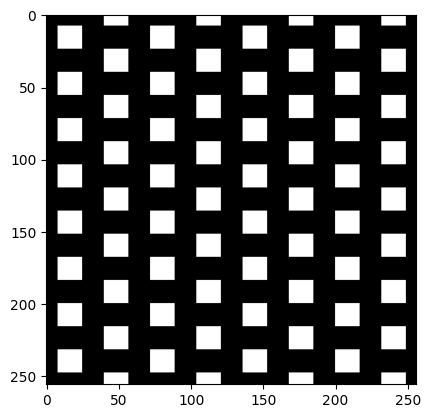

Final mask saved to H:/DDGAN/final_combined_mask.npy


In [40]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

# Directory where the .npy files are stored
input_directory = r"H:/DDGAN/npy_files"
output_file_path = r"H:/DDGAN/final_combined_mask.npy"  # Path to save the final mask

# Define the threshold for "extremely small"
threshold = 0.01  # Adjusted to the threshold that worked well

# Initialize the cumulative mask
cumulative_mask = None

# Process each .npy file that matches the 'uv_*.npy' pattern
for file_path in glob.glob(os.path.join(input_directory, 'uv_*.npy')):
    # Load the reshaped data from the .npy file
    u_data = np.load(file_path)
    u_matrix = u_data[0]  # Assuming the first element is the u matrix

    # Create a mask where u values are below the threshold
    mask = u_matrix < threshold

    # Update the cumulative mask using a logical AND operation
    if cumulative_mask is None:
        cumulative_mask = mask
    else:
        cumulative_mask = np.logical_and(cumulative_mask, mask)
    
    print(f"Processed: {os.path.basename(file_path)}")

# Check if a cumulative mask was created and visualize it
if cumulative_mask is not None:
    plt.imshow(cumulative_mask, cmap='gray')
    plt.show()
    
    # Save the final mask to an npy file
    np.save(output_file_path, cumulative_mask)
    print(f"Final mask saved to {output_file_path}")
else:
    print("No files were processed or no matching conditions were found.")


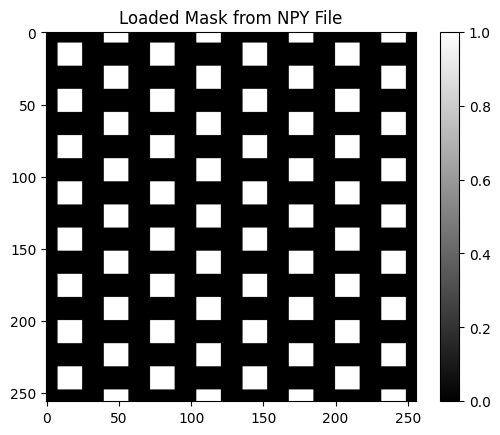

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Path to the .npy file where the mask is stored
mask_file_path = r"H:/DDGAN/building_location.npy"

# Load the mask from the .npy file
mask = np.load(mask_file_path)

# Plotting the mask
plt.imshow(mask, cmap='gray')  # Using gray scale for better visibility of the binary mask
plt.title('Loaded Mask from NPY File')
plt.colorbar()  # Show color bar to indicate the scale
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt

file_path = r"H:/DDGAN/DD_test/u_0_u_reshaped.npy"

# Load the grid from the .npy file
grid = np.load(file_path)

def pick_random_block(grid):
    height, width = grid.shape
    min_x = 64
    max_x = width - 128
    min_y = 64
    max_y = height - 128
    x = np.random.randint(min_x, max_x + 1)
    y = np.random.randint(min_y, max_y + 1)
    return (y, x)

xy = pick_random_block(grid)
print(xy)

FileNotFoundError: [Errno 2] No such file or directory: 'H:/DDGAN/DD_test/u_0_u_reshaped.npy'

In [6]:
import numpy as np
import pandas as pd

# Path to the .npy file
mask_file_path = r"H:/DDGAN/building_location.npy"

# Load the data from the .npy file
data = np.load(mask_file_path)

# If the data is a boolean array, convert it to integers (1s and 0s)
data = data.astype(int)  # Converts True to 1, False to 0

# Convert the numpy array to a pandas DataFrame
df = pd.DataFrame(data)

# Specify the path where the Excel file will be saved
excel_file_path = r"H:/DDGAN/building_location.xlsx"

# Save the DataFrame to an Excel file
df.to_excel(excel_file_path, index=False, engine='openpyxl')

print(f"Data saved to {excel_file_path} successfully.")


Data saved to H:/DDGAN/building_location.xlsx successfully.


In [7]:
import pandas as pd
import numpy as np

# Path to the Excel file
excel_file_path = r"H:/DDGAN/building_location.xlsx"

# Load the data from the Excel file
df = pd.read_excel(excel_file_path, engine='openpyxl')

# Convert the DataFrame to a NumPy array
data = df.to_numpy()

# Specify the path where the .npy file will be saved
npy_file_path = r"H:/DDGAN/building_height.npy"

# Save the data to a .npy file
np.save(npy_file_path, data)

print(f"Data from Excel saved to {npy_file_path} as a NumPy array.")

Data from Excel saved to H:/DDGAN/building_height.npy as a NumPy array.


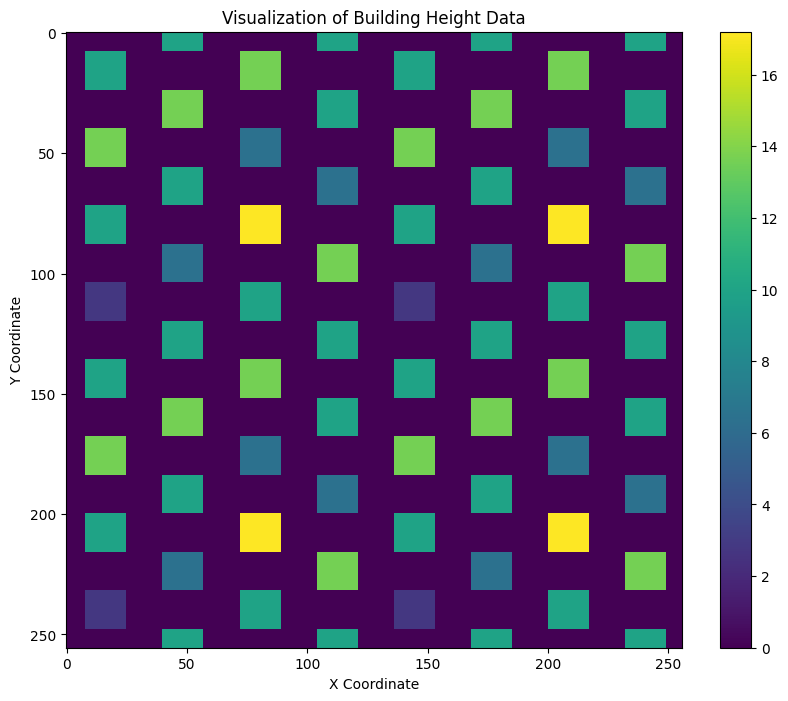

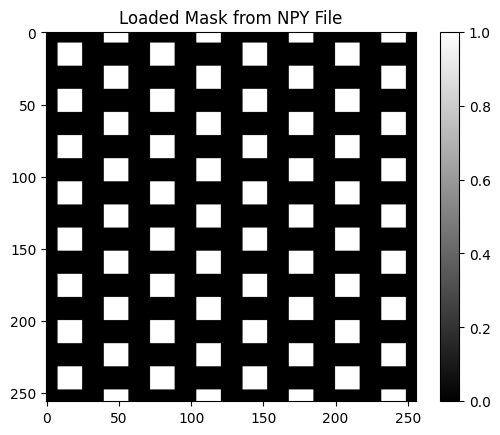

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Path to the .npy file
npy_file_path = r"H:/DDGAN/building_height.npy"

# Load the data from the .npy file
data = np.load(npy_file_path)

# Check if the data needs to be reshaped (if it's flat or not the expected shape)
# Assuming the data should be a 256x256 matrix (as from previous context)
if data.ndim == 1:
    data = data.reshape((256, 256))  # Reshape only if data is one-dimensional

# Plot the data
plt.figure(figsize=(10, 8))
plt.imshow(data, cmap='viridis', interpolation='nearest')  # Use a color map that fits your data's context
plt.colorbar()  # Show a color bar to indicate scale
plt.title('Visualization of Building Height Data')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()
# Path to the .npy file where the mask is stored
mask_file_path = r"H:/DDGAN/building_location.npy"

# Load the mask from the .npy file
mask = np.load(mask_file_path)

# Plotting the mask
plt.imshow(mask, cmap='gray')  # Using gray scale for better visibility of the binary mask
plt.title('Loaded Mask from NPY File')
plt.colorbar()  # Show color bar to indicate the scale
plt.show()